<a href='https://srihar1-raman.github.io/srihari.github.io/'><img src='https://srihar1-raman.github.io/srihari.github.io/img/devjane.png'/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
pwd

'/Users/user/Desktop/PIERIAN DATA ML/Boosting'

In [3]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
X = pd.get_dummies(df.drop('class',axis=1), drop_first = True)
y = df["class"]

In [6]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the loss function,
 |  e.g. binary or multiclass log loss. Binary classification
 |  is a special case where only a single regression tree is

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {"n_estimators":[1, 4, 5, 10, 30, 70, 90], "max_depth":[3, 5, 7, 8]}

In [15]:
model = GradientBoostingClassifier()

In [16]:
grid_model = GridSearchCV(model, param_grid)

In [17]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7, 8],
                         'n_estimators': [1, 4, 5, 10, 30, 70, 90]})

In [18]:
grid_model.best_params_

{'max_depth': 5, 'n_estimators': 70}

In [19]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [21]:
pred = grid_model.predict(X_test)

In [22]:
pred

array(['e', 'p', 'p', ..., 'p', 'p', 'p'], dtype=object)

In [23]:
np.sum(y_test != pred)

0

In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [27]:
grid_model.best_estimator_.feature_importances_

array([ 5.97422741e-04,  1.19949359e-16,  8.17792147e-17,  0.00000000e+00,
        2.04849502e-18,  1.81664814e-03,  7.89316712e-17,  1.24066460e-16,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.08284819e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.83314607e-04,
        2.03849945e-16,  7.02360777e-03,  4.66380129e-03,  0.00000000e+00,
        6.82794988e-03,  1.26488632e-06,  6.23769344e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.40948518e-02,
        2.35414517e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.23359232e-17,  4.86477745e-18,  0.00000000e+00,  3.35467821e-15,
        3.94291325e-16,  0.00000000e+00,  4.02082949e-17,  0.00000000e+00,
        7.88917003e-03,  1.24160191e-03,  1.80155677e-01,  0.00000000e+00,
        3.30350003e-02,  3.02715100e-06,  1.29085092e-03,  0.00000000e+00,
        0.00000000e+00,  1.77196504e-03,  6.09205458e-02,  6.10896069e-04,
        0.00000000e+00,  

In [34]:
dff = pd.DataFrame(index = X.columns, data = grid_model.best_estimator_.feature_importances_, columns= ["importance"])
dff = dff[dff["importance"]>0].sort_values("importance", ascending = False)
dff 

,importance
odor_n,6.237693e-01
stalk-root_c,1.801557e-01
stalk-surface-below-ring_y,6.092055e-02
spore-print-color_r,3.412078e-02
stalk-root_r,3.303500e-02
gill-spacing_w,1.409485e-02
stalk-shape_t,7.889170e-03
bruises_t,7.023608e-03
odor_l,6.827950e-03
odor_c,4.663801e-03


In [35]:
dff.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
importance,48.0,0.020833,0.093072,2.048495e-18,6.017408e-16,0.000225,0.003532,0.623769


In [36]:
dff[dff["importance"] > 0.020833]

,importance
odor_n,0.623769
stalk-root_c,0.180156
stalk-surface-below-ring_y,0.060921
spore-print-color_r,0.034121
stalk-root_r,0.033035


In [37]:
dff[dff["importance"] > 0.000527]


,importance
odor_n,0.623769
stalk-root_c,0.180156
stalk-surface-below-ring_y,0.060921
spore-print-color_r,0.034121
stalk-root_r,0.033035
gill-spacing_w,0.014095
stalk-shape_t,0.007889
bruises_t,0.007024
odor_l,0.006828
odor_c,0.004664


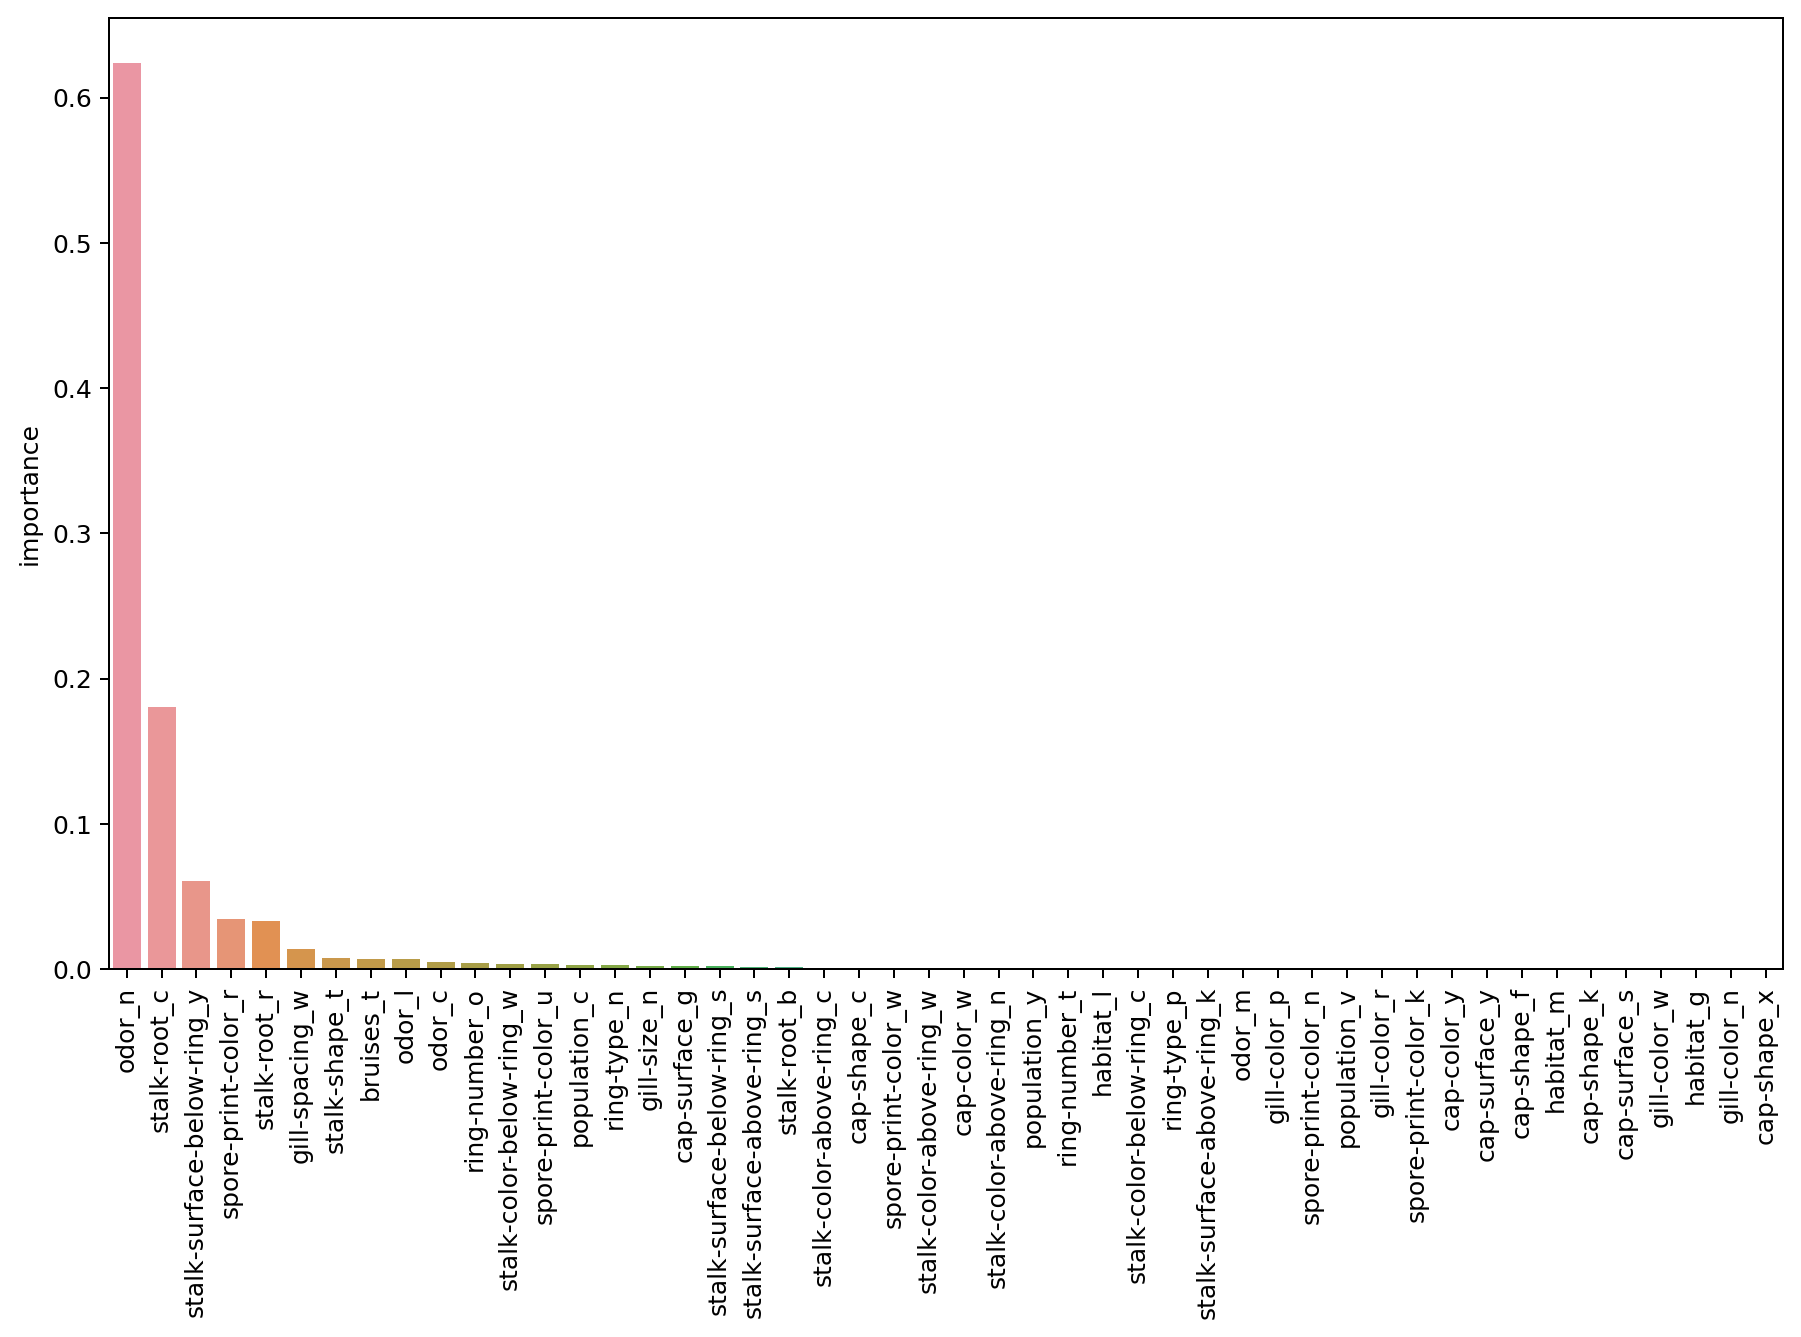

In [39]:
plt.figure(figsize=(12, 7), dpi = 180)
sns.barplot(data = dff, x = dff["importance"].index, y = "importance")
plt.xticks(rotation=90);